# **Import Required Libraries/Modules**

In [ ]:
#all libraries installed


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Common
from datetime import datetime #=> date time conversion on dataframe
import datetime as dt
import re
import time
import os
from pickle import dump
from pickle import load
 
# Processor
from numba import njit
 
# Dataframe
import pandas as pd
 
# Numerical
import numpy as np
import math
from math import sqrt
 
# Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Model
from keras import optimizers
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
import torch
import torch.nn as nn
import torch.nn.functional as f
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Evaluating
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Visualization
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns #plotting

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 
 
pd.options.mode.chained_assignment = None  #https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [ ]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df = df.set_index('Date') 
df

,Open,High,Low,Close,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,660.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577
2019-07-31,660.0,685.0,660.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003
2019-08-01,660.0,685.0,660.0,665.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122
2019-08-04,665.0,670.0,645.0,655.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386
2019-08-05,655.0,655.0,630.0,640.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23,1160.0,1160.0,1145.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029
2022-10-24,1145.0,1150.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134
2022-10-25,1150.0,1155.0,1140.0,1150.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826


# **MODELING 1 LSTM**

## Features OHLC

In [ ]:
# Build and train the model
def fit_model(train, val, timesteps, hl, lr, batch, epochs):
  '''
  Split data train ==> X_train & y_train
  Split data validasi ==> X_val & y_val
  Inisiasi model neural network (RNN LSTM)
  Fitting/ Training data

  Parameter:
    train = dataframe train (yang belum dipisah X & y)
    val = dataframe validasi (yang belum dipisah X & y)
    timesteps = sequence
    hl = hidden layer
    lr = learning rate
    batch = mini batch untuk iterasi
    epochs = jumlah iterasi

  Returns:
    model = model LSTM hasil training
    model[loss] = nilai loss hasil training
    model[val_loss] = nilai loss hasil validasi
  '''
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array
  
  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                  activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.LSTM(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.LSTM(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))
  
  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss'], history

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r = r2_score(Y_test,Y_hat)
  return  mae, mse, rmse, r, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-LSTM model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.legend(['train','val'],loc = 'upper right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open','High','Low','Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 4)
              Open    High     Low   Close
Date                                      
2019-07-30   655.0   670.0   655.0   660.0
2019-07-31   660.0   685.0   660.0   660.0
2019-08-01   660.0   685.0   660.0   665.0
2019-08-04   665.0   670.0   645.0   655.0
2019-08-05   655.0   655.0   630.0   640.0
...            ...     ...     ...     ...
2022-10-23  1160.0  1160.0  1145.0  1145.0
2022-10-24  1145.0  1150.0  1140.0  1150.0
2022-10-25  1150.0  1155.0  1140.0  1150.0
2022-10-26  1150.0  1165.0  1145.0  1145.0
2022-10-27  1145.0  1150.0  1135.0  1135.0

[795 rows x 4 columns]


In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 4) (159, 4) (159, 4)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 4) (159, 4) (159, 4)


In [ ]:
# LSTM Hyperparameters (All Feature)
timesteps = 10
hl = [64]
lr = 0.001
batch_size = 128
num_epochs = 100


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 4)             144       
                                                                 
 lstm_1 (LSTM)               (None, 64)                17664     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 17,873
Trainable params: 17,873
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
5/5 [==============================] - 4s 120ms/step - loss: 0.1779 - val_loss: 0.6770
Epoch 2/100
5/5 [==============================] - 0s 28ms/step - loss: 0.1527 -

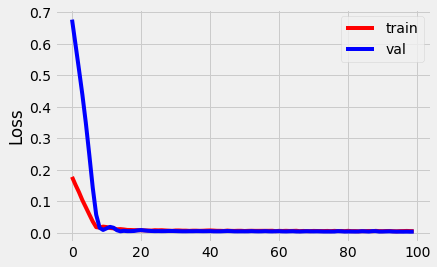

In [ ]:
# Training the model
model, train_error, val_error, history_lstm = fit_model(train, val, timesteps, hl, lr, batch_size, num_epochs) 
print('\n')
plot_error(train_error,val_error)

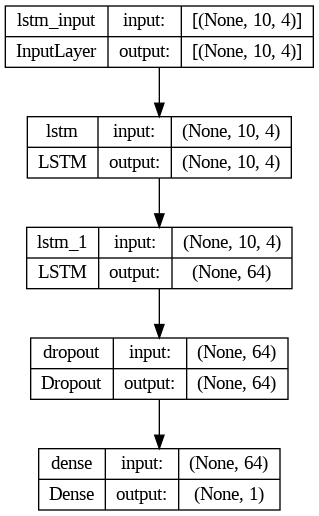

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 1s 5ms/step


MAE = 0.05074520820732205
MSE = 0.004068529658025073
RMSE = 0.06378502691090655
R-Squared Score = 0.48111115164527196


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_lstm = np.concatenate((empty_fill, predicted), axis=1)
pred_lstm = sc.inverse_transform(pred_lstm)

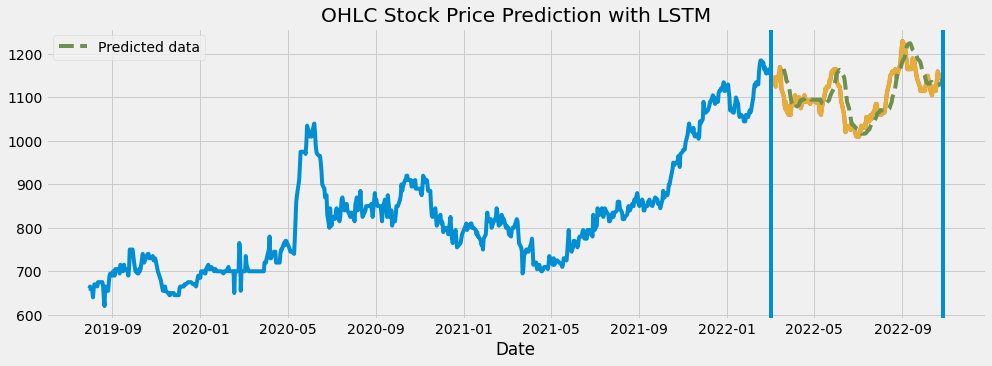

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:, -1])
plt.plot(test_date, pred_lstm[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.show()

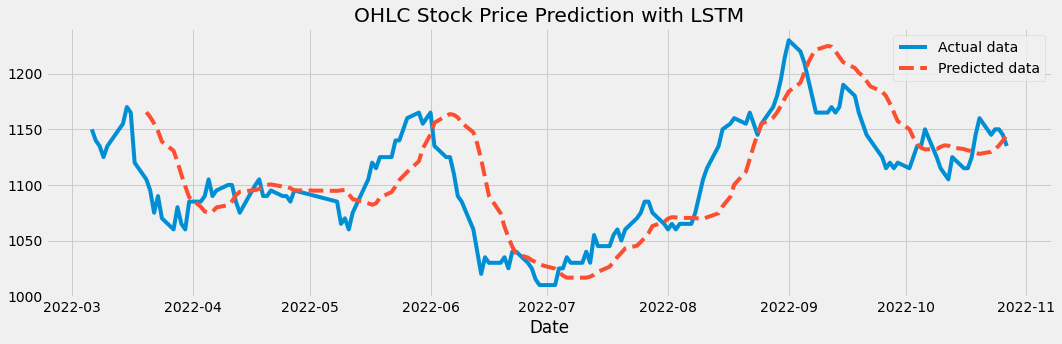

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_lstm[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-LSTM.h5')

In [ ]:
output = pd.DataFrame(pred_lstm, columns = variables)
dates = pd.DataFrame(test_sc, columns = variables)

output['Pred_LSTM'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_LSTM']]
output

,Close,Pred_LSTM
0,1150.0,1165.393638
1,1140.0,1161.009581
2,1135.0,1155.193123
3,1125.0,1148.393004
4,1135.0,1138.958026
...,...,...
144,1125.0,1129.751208
145,1115.0,1131.903986
146,1110.0,1135.467512
147,1105.0,1139.808698


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_LSTM'])

Model Evaluation After Invers Transform


MAE = 21.86337443206134
MSE = 782.7660853384217
RMSE = 27.977957133043535
R-Squared Score = 0.6912709244698909


In [ ]:
output.to_csv(f'OHLC-LSTM.csv', index = False)

## Features OHLC + makro + mikro + VIX

In [ ]:
# Build and train the model
def fit_model(train, val, timesteps, hl, lr, batch, epochs):
  '''
  Split data train ==> X_train & y_train
  Split data validasi ==> X_val & y_val
  Inisiasi model neural network (RNN LSTM)
  Fitting/ Training data

  Parameter:
    train = dataframe train (yang belum dipisah X & y)
    val = dataframe validasi (yang belum dipisah X & y)
    timesteps = sequence
    hl = hidden layer
    lr = learning rate
    batch = mini batch untuk iterasi
    epochs = jumlah iterasi

  Returns:
    model = model LSTM hasil training
    model[loss] = nilai loss hasil training
    model[val_loss] = nilai loss hasil validasi
  '''
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array
  
  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                  activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.LSTM(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.LSTM(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))
  
  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss'], history

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r = r2_score(Y_test,Y_hat)
  return  mae, mse, rmse, r, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-LSTM model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.legend(['train','val'],loc = 'upper right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER', 'Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 14)
              Open    High     Low   Inflasi     Kurs            M2  \
Date                                                                  
2019-07-30   655.0   670.0   655.0  3.371739  14034.0  5.935133e+06   
2019-07-31   660.0   685.0   660.0  3.379130  14026.0  5.934847e+06   
2019-08-01   660.0   685.0   660.0  3.386522  14098.0  5.934562e+06   
2019-08-04   665.0   670.0   645.0  3.393913  14164.5  5.937881e+06   
2019-08-05   655.0   655.0   630.0  3.401304  14231.0  5.941201e+06   
...            ...     ...     ...       ...      ...           ...   
2022-10-23  1160.0  1160.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-24  1145.0  1150.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-25  1150.0  1155.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-26  1150.0  1165.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-27  1145.0  1150.0  1135.0  5.950000  15247.0  7.890747e+06   

             Vix Ope

In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 14) (159, 14) (159, 14)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 14) (159, 14) (159, 14)


In [ ]:
# LSTM Hyperparameters (All Feature)
timesteps = 10
hl = [64]
lr = 0.001
batch_size = 128
num_epochs = 100


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 14)            1624      
                                                                 
 lstm_3 (LSTM)               (None, 64)                20224     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 21,913
Trainable params: 21,913
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
5/5 [==============================] - 9s 472ms/step - loss: 0.1531 - val_loss: 0.4928
Epoch 2/100
5/5 [==============================] - 0s 94ms/step - loss: 0.0999

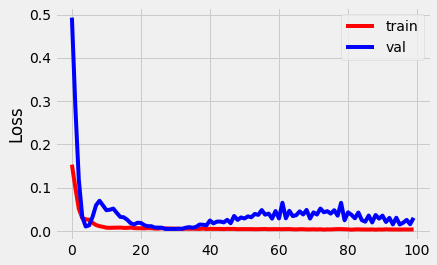

In [ ]:
# Training the model
model, train_error, val_error, history_lstm = fit_model(train, val, timesteps, hl, lr, batch_size, num_epochs) 
print('\n')
plot_error(train_error,val_error)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 0s 7ms/step


MAE = 0.15935075086221037
MSE = 0.030378713054104434
RMSE = 0.1742949025476776
R-Squared Score = -2.8744157609986996


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_lstm2 = np.concatenate((empty_fill, predicted), axis=1)
pred_lstm2 = sc.inverse_transform(pred_lstm2)

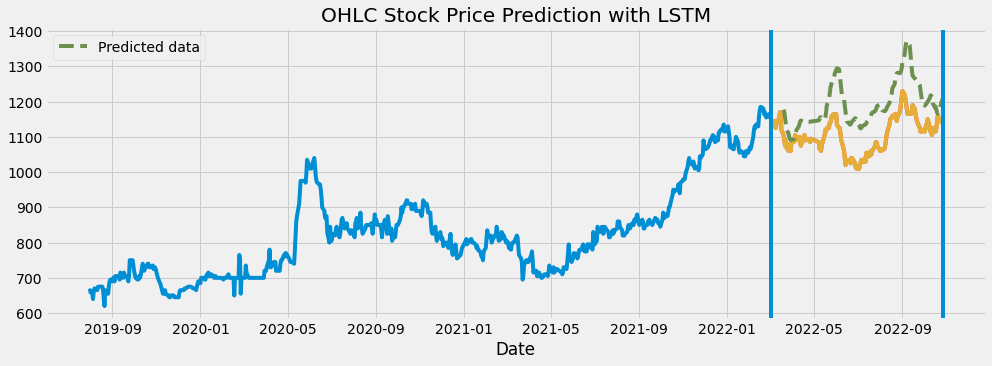

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:, -1])
plt.plot(test_date, pred_lstm2[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.show()

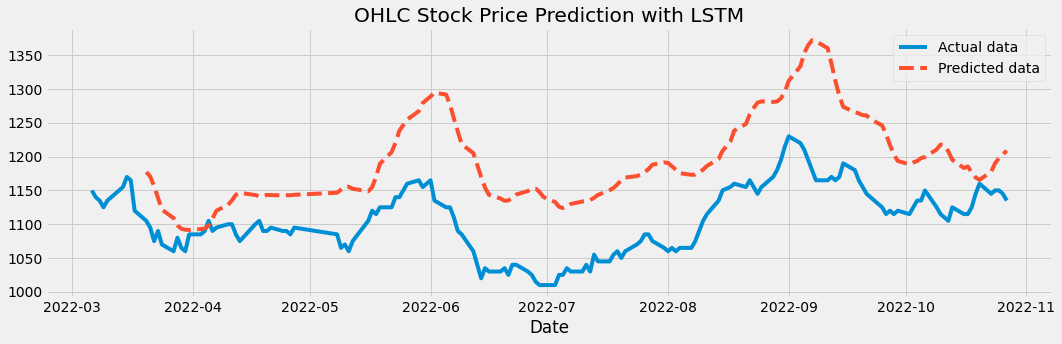

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_lstm2[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-LSTM-2.h5')

In [ ]:
output = pd.DataFrame(pred_lstm2, columns = variables)
dates = pd.DataFrame(test_sc, columns = variables)

output['Pred_LSTM'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_LSTM']]
output

,Close,Pred_LSTM
0,1150.0,1177.193691
1,1140.0,1170.565593
2,1135.0,1156.350386
3,1125.0,1138.952840
4,1135.0,1121.563545
...,...,...
144,1125.0,1177.535711
145,1115.0,1190.090424
146,1110.0,1197.798868
147,1105.0,1203.431014


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_LSTM'])

Model Evaluation After Invers Transform


MAE = 93.75790444396486
MSE = 11827.049821053684
RMSE = 108.75224053348825
R-Squared Score = -3.664681091700361


In [ ]:
output.to_csv(f'OHLC-LSTM-2.csv', index = False)

## Features OHLC + makro + mikro + VIX + Sentiment

In [ ]:
# Build and train the model
def fit_model(train, val, timesteps, hl, lr, batch, epochs):
  '''
  Split data train ==> X_train & y_train
  Split data validasi ==> X_val & y_val
  Inisiasi model neural network (RNN LSTM)
  Fitting/ Training data

  Parameter:
    train = dataframe train (yang belum dipisah X & y)
    val = dataframe validasi (yang belum dipisah X & y)
    timesteps = sequence
    hl = hidden layer
    lr = learning rate
    batch = mini batch untuk iterasi
    epochs = jumlah iterasi

  Returns:
    model = model LSTM hasil training
    model[loss] = nilai loss hasil training
    model[val_loss] = nilai loss hasil validasi
  '''
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array
  
  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=80,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                  activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.LSTM(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.LSTM(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))
  
  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss'], history

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r = r2_score(Y_test,Y_hat)
  return  mae, mse, rmse, r, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-LSTM model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.legend(['train','val'],loc = 'upper right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM', 'Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 17)
              Open    High     Low   Inflasi     Kurs            M2  \
Date                                                                  
2019-07-30   655.0   670.0   655.0  3.371739  14034.0  5.935133e+06   
2019-07-31   660.0   685.0   660.0  3.379130  14026.0  5.934847e+06   
2019-08-01   660.0   685.0   660.0  3.386522  14098.0  5.934562e+06   
2019-08-04   665.0   670.0   645.0  3.393913  14164.5  5.937881e+06   
2019-08-05   655.0   655.0   630.0  3.401304  14231.0  5.941201e+06   
...            ...     ...     ...       ...      ...           ...   
2022-10-23  1160.0  1160.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-24  1145.0  1150.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-25  1150.0  1155.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-26  1150.0  1165.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-27  1145.0  1150.0  1135.0  5.950000  15247.0  7.890747e+06   

             Vix Ope

In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 17) (159, 17) (159, 17)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 17) (159, 17) (159, 17)


In [ ]:
# LSTM Hyperparameters (All Feature)
timesteps = 10
hl = [64]
lr = 0.001
batch_size = 128
num_epochs = 100


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 10, 17)            2380      
                                                                 
 lstm_5 (LSTM)               (None, 64)                20992     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 23,437
Trainable params: 23,437
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
5/5 [==============================] - 4s 115ms/step - loss: 0.1726 - val_loss: 0.6169
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.1193

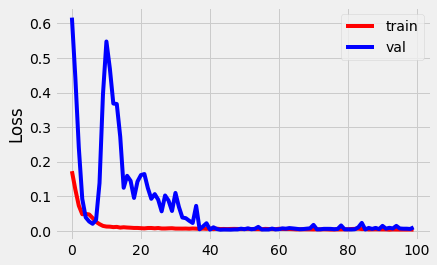

In [ ]:
# Training the model
model, train_error, val_error, history_lstm = fit_model(train, val, timesteps, hl, lr, batch_size, num_epochs) 
print('\n')
plot_error(train_error,val_error)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 0s 5ms/step


MAE = 0.08173417642888714
MSE = 0.00997453417265336
RMSE = 0.09987258969633941
R-Squared Score = -0.2721240803822318


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_lstm3 = np.concatenate((empty_fill, predicted), axis=1)
pred_lstm3 = sc.inverse_transform(pred_lstm3)

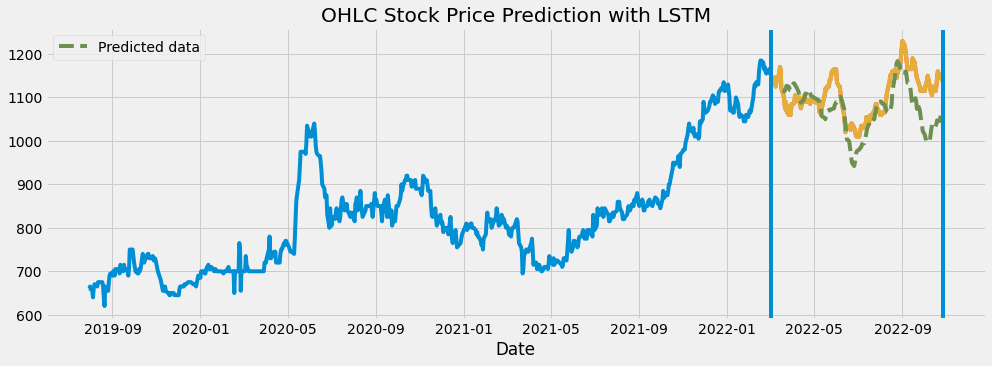

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:, -1])
plt.plot(test_date, pred_lstm3[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.show()

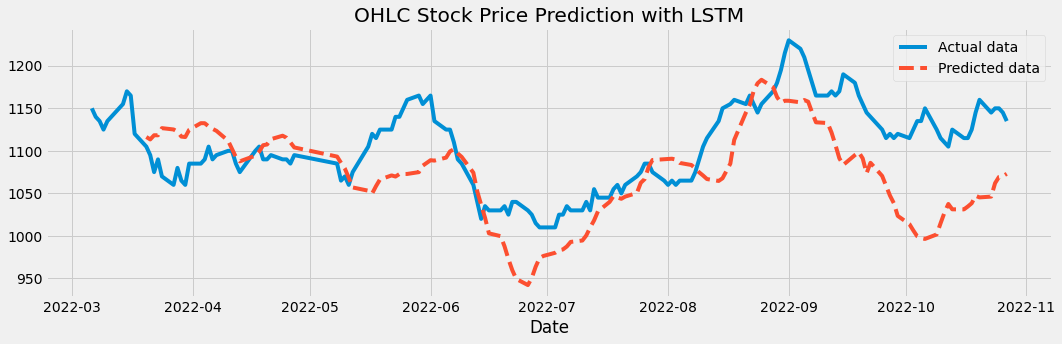

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_lstm3[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with LSTM')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-LSTM-3.h5')

In [ ]:
output = pd.DataFrame(pred_lstm3, columns = variables)
dates = pd.DataFrame(test_sc, columns = variables)

output['Pred_LSTM'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_LSTM']]
output

,Close,Pred_LSTM
0,1150.0,1116.319488
1,1140.0,1113.446266
2,1135.0,1118.359888
3,1125.0,1118.295161
4,1135.0,1126.707110
...,...,...
144,1125.0,1046.208932
145,1115.0,1062.025732
146,1110.0,1069.348444
147,1105.0,1070.209454


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_LSTM'])

Model Evaluation After Invers Transform


MAE = 53.156142602830926
MSE = 4819.764280503419
RMSE = 69.42452218419237
R-Squared Score = -0.90095278584986


In [ ]:
output.to_csv(f'OHLC-LSTM-3.csv', index = False)

# **MODELING 2 GRU**

## Features OHLC

In [ ]:
# Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array

  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.GRU(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.GRU(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.GRU(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))

  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r2 = r2_score(Y_test,Y_hat)
  return mae, mse, rmse, r2, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-GRU model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.title('Loss Plot')
  plt.legend(['train','val'],loc = 'lower right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open','High','Low','Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 4)
              Open    High     Low   Close
Date                                      
2019-07-30   655.0   670.0   655.0   660.0
2019-07-31   660.0   685.0   660.0   660.0
2019-08-01   660.0   685.0   660.0   665.0
2019-08-04   665.0   670.0   645.0   655.0
2019-08-05   655.0   655.0   630.0   640.0
...            ...     ...     ...     ...
2022-10-23  1160.0  1160.0  1145.0  1145.0
2022-10-24  1145.0  1150.0  1140.0  1150.0
2022-10-25  1150.0  1155.0  1140.0  1150.0
2022-10-26  1150.0  1165.0  1145.0  1145.0
2022-10-27  1145.0  1150.0  1135.0  1135.0

[795 rows x 4 columns]


In [ ]:
series

,Open,High,Low,Close
Date,,,,
2019-07-30,655.0,670.0,655.0,660.0
2019-07-31,660.0,685.0,660.0,660.0
2019-08-01,660.0,685.0,660.0,665.0
2019-08-04,665.0,670.0,645.0,655.0
2019-08-05,655.0,655.0,630.0,640.0
...,...,...,...,...
2022-10-23,1160.0,1160.0,1145.0,1145.0
2022-10-24,1145.0,1150.0,1140.0,1150.0
2022-10-25,1150.0,1155.0,1140.0,1150.0


In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 4) (159, 4) (159, 4)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 4) (159, 4) (159, 4)


In [ ]:
# GRU Hyperparameters (All Feature)
timesteps = 5
hl = [32]
lr = 0.001
batch_size = 64
num_epochs = 100

# GRU Hyperparameters (Basic OHLC)
timesteps = 5
hl = [64]
lr = 0.005
batch_size = 128
num_epochs = 50

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5, 4)              120       
                                                                 
 gru_1 (GRU)                 (None, 64)                13440     
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 13,625
Trainable params: 13,625
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
5/5 [==============================] - 5s 149ms/step - loss: 0.0509 - val_loss: 0.0454
Epoch 2/50
5/5 [==============================] - 0s 19ms/step - loss: 0.0232 -

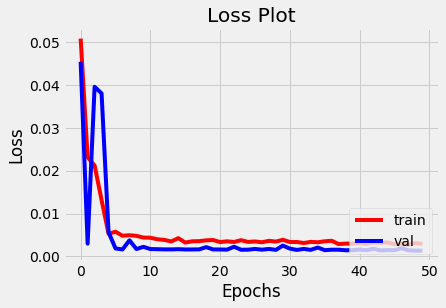

In [ ]:
# Training the model
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
print('\n')
plot_error(train_error,val_error)

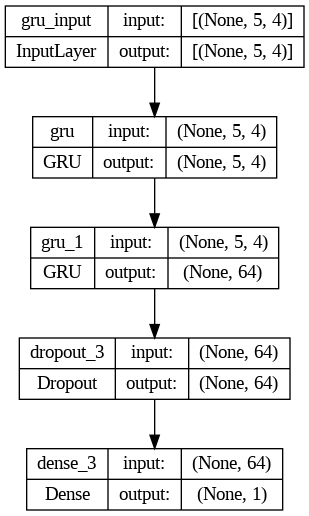

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 0s 3ms/step


MAE = 0.028817939763096018
MSE = 0.0013089916006058745
RMSE = 0.03617998895253942
R-Squared Score = 0.8332753298201814


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_gru = np.concatenate((empty_fill, predicted), axis=1)
pred_gru = sc.inverse_transform(pred_gru)

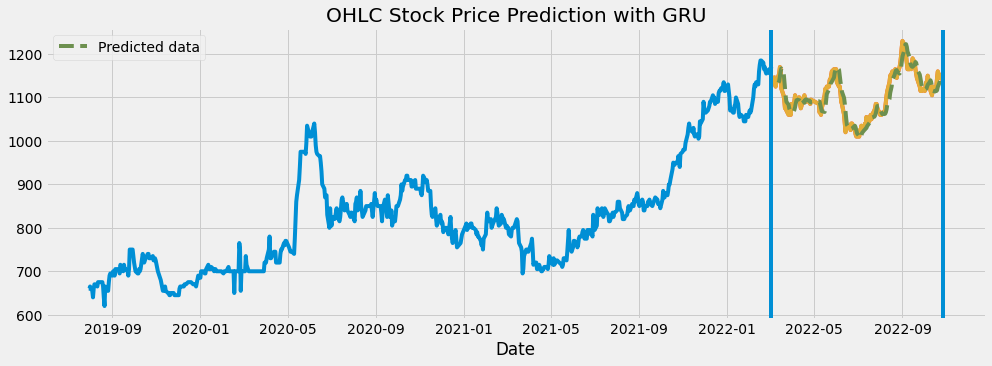

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:,-1])
plt.plot(test_date, pred_gru[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.show()

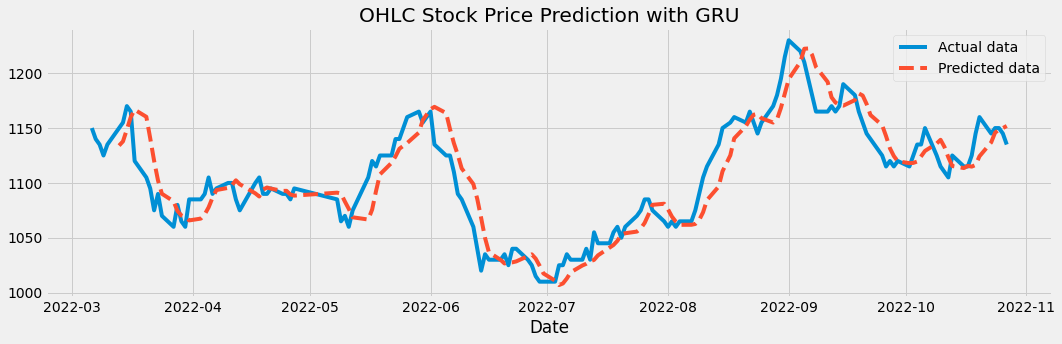

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_gru[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-GRU.h5')

In [ ]:
output = pd.DataFrame(pred_gru, columns = ['Open','High','Low','Close'])
dates = pd.DataFrame(test_sc, columns = ['Open','High','Low','Close'])

In [ ]:
output['Pred_GRU'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_GRU']]
output

,Close,Pred_GRU
0,1150.0,1134.035918
1,1140.0,1137.833901
2,1135.0,1148.671510
3,1125.0,1159.937957
4,1135.0,1166.746327
...,...,...
149,1115.0,1136.924295
150,1115.0,1145.813004
151,1125.0,1148.432507
152,1145.0,1149.983787


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_GRU'])

Model Evaluation After Invers Transform


MAE = 16.27162305372102
MSE = 429.9490767356243
RMSE = 20.735213448036273
R-Squared Score = 0.8272339764806993


In [ ]:
output.to_csv(f'OHLC-GRU.csv', index = False)

## Features OHLC + makro + mikro + VIX

In [ ]:
# Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array

  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.GRU(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.GRU(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.GRU(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))

  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r2 = r2_score(Y_test,Y_hat)
  return mae, mse, rmse, r2, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-GRU model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.title('Loss Plot')
  plt.legend(['train','val'],loc = 'lower right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER', 'Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 14)
              Open    High     Low   Inflasi     Kurs            M2  \
Date                                                                  
2019-07-30   655.0   670.0   655.0  3.371739  14034.0  5.935133e+06   
2019-07-31   660.0   685.0   660.0  3.379130  14026.0  5.934847e+06   
2019-08-01   660.0   685.0   660.0  3.386522  14098.0  5.934562e+06   
2019-08-04   665.0   670.0   645.0  3.393913  14164.5  5.937881e+06   
2019-08-05   655.0   655.0   630.0  3.401304  14231.0  5.941201e+06   
...            ...     ...     ...       ...      ...           ...   
2022-10-23  1160.0  1160.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-24  1145.0  1150.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-25  1150.0  1155.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-26  1150.0  1165.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-27  1145.0  1150.0  1135.0  5.950000  15247.0  7.890747e+06   

             Vix Ope

In [ ]:
series

,Open,High,Low,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Close
Date,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,660.0
2019-07-31,660.0,685.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,660.0
2019-08-01,660.0,685.0,660.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,665.0
2019-08-04,665.0,670.0,645.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,655.0
2019-08-05,655.0,655.0,630.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23,1160.0,1160.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,1145.0
2022-10-24,1145.0,1150.0,1140.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,1150.0
2022-10-25,1150.0,1155.0,1140.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,1150.0


In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 14) (159, 14) (159, 14)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 14) (159, 14) (159, 14)


In [ ]:
# GRU Hyperparameters (All Feature)
timesteps = 5
hl = [32]
lr = 0.001
batch_size = 64
num_epochs = 100

# GRU Hyperparameters (Basic OHLC)
timesteps = 5
hl = [64]
lr = 0.005
batch_size = 128
num_epochs = 50

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 5, 14)             1260      
                                                                 
 gru_3 (GRU)                 (None, 64)                15360     
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,685
Trainable params: 16,685
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
5/5 [==============================] - 4s 130ms/step - loss: 0.0493 - val_loss: 0.0079
Epoch 2/50
5/5 [==============================] - 0s 32ms/step - loss: 0.0669 -

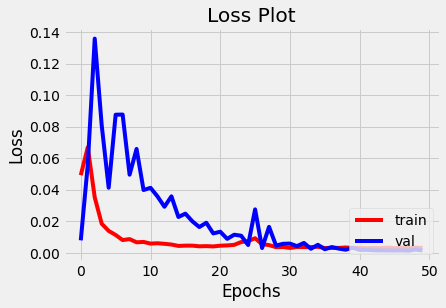

In [ ]:
# Training the model
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
print('\n')
plot_error(train_error,val_error)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 0s 3ms/step


MAE = 0.03077035506639436
MSE = 0.0015739511307454766
RMSE = 0.03967305295468798
R-Squared Score = 0.7995277563039892


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_gru2 = np.concatenate((empty_fill, predicted), axis=1)
pred_gru2 = sc.inverse_transform(pred_gru2)

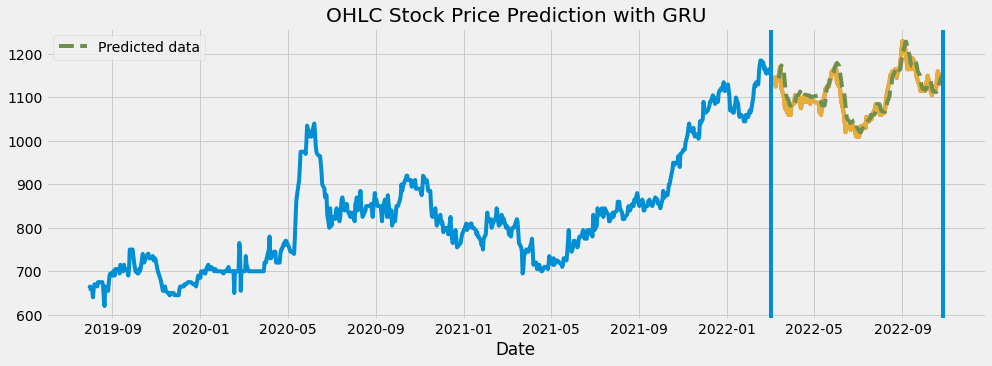

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:,-1])
plt.plot(test_date, pred_gru2[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.show()

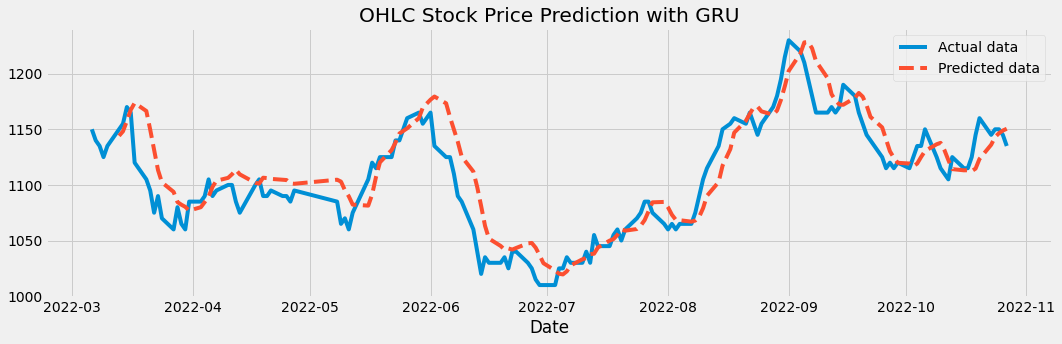

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_gru2[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-GRU-2.h5')

In [ ]:
output = pd.DataFrame(pred_gru2, columns = variables)
dates = pd.DataFrame(test_sc, columns = variables)

In [ ]:
output['Pred_GRU'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_GRU']]
output

,Close,Pred_GRU
0,1150.0,1144.118767
1,1140.0,1148.142619
2,1135.0,1157.419249
3,1125.0,1167.443635
4,1135.0,1173.693208
...,...,...
149,1115.0,1136.128281
150,1115.0,1142.999592
151,1125.0,1146.456363
152,1145.0,1148.873098


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_GRU'])

Model Evaluation After Invers Transform


MAE = 18.119460092736528
MSE = 504.6222604659816
RMSE = 22.463798887676624
R-Squared Score = 0.7972281229629516


In [ ]:
output.to_csv(f'OHLC-GRU-2.csv', index = False)

## Features OHLC + makro + mikro + VIX + Sentiment

In [ ]:
# Build and train the model
def fit_model(train,val,timesteps,hl,lr,batch,epochs):
  X_train = []
  Y_train = []
  X_val = []
  Y_val = []

  # Loop for training data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,train.shape[0]):
      X_train.append(train[i-timesteps:i]) # List
      Y_train.append(train[i][-1]) # <== Index 3 (CLOSE)
  X_train, Y_train = np.array(X_train), np.array(Y_train) # Transform list to numpy array

  # Loop for val data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,val.shape[0]):
      X_val.append(val[i-timesteps:i]) # List
      Y_val.append(val[i][-1]) # <== Index 3 (CLOSE)
  X_val, Y_val = np.array(X_val), np.array(Y_val) # Transform list to numpy array

  # Setting up an early stop
  earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=150,  verbose=1, mode='min')
  callbacks_list = [earlystop]
  
  # Adding Layers to the model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.GRU(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                activation = 'relu'))
  
  # Hidden layer
  for i in range(len(hl)-1):        
      model.add(tf.keras.layers.GRU(hl[i],activation = 'relu',return_sequences = True))
      model.add(tf.keras.layers.Dropout(0.2))
  
  # Hidden layer
  model.add(tf.keras.layers.GRU(hl[-1],activation = 'relu'))
  model.add(tf.keras.layers.Dropout(0.2))

  # Output layer
  model.add(tf.keras.layers.Dense(1))

  # Compile the model
  model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = lr), loss = 'mean_squared_error')
  print(model.summary())

  # Training the data
  history = model.fit(X_train,Y_train,epochs = epochs,batch_size = batch,validation_data = (X_val, Y_val),verbose = 1,
                      shuffle = False, callbacks=callbacks_list)
  model.reset_states()
  return model, history.history['loss'], history.history['val_loss']

In [ ]:
# Evaluating the model
def evaluate_model(model,test,timesteps):
  X_test = []
  Y_test = []

  # Loop for testing data
  # Index: 0 (Open), 1 (High), 2 (Low), ...3 (Close)
  for i in range(timesteps,test.shape[0]):
      X_test.append(test[i-timesteps:i]) # List
      Y_test.append(test[i][-1]) # <== Index 3 (CLOSE)
  X_test,Y_test = np.array(X_test), np.array(Y_test) # Transform list to numpy array

  # Prediction Time !!!!
  Y_hat = model.predict(X_test)
  mae = mean_absolute_error(Y_test,Y_hat)
  mse = mean_squared_error(Y_test,Y_hat)
  rmse = sqrt(mse)
  r2 = r2_score(Y_test,Y_hat)
  return mae, mse, rmse, r2, Y_test, Y_hat

In [ ]:
# Plotting the predictions
def plot_data(Y_test,Y_hat,test_data=None):
  # date = test_data.reset_index()['Date']
  plt.plot(Y_test,c = 'r')
  plt.plot(Y_hat,c = 'y')
  plt.xlabel('Day')
  plt.ylabel('Price')
  plt.title('Stock Prediction Graph using Multivariate-GRU model')
  plt.legend(['Actual','Predicted'],loc = 'lower right')
  plt.show()

In [ ]:
# Plotting the training errors
def plot_error(train_loss,val_loss):
  plt.plot(train_loss,c = 'r')
  plt.plot(val_loss,c = 'b')
  plt.ylabel('Loss')
  plt.xlabel('Epochs')
  plt.title('Loss Plot')
  plt.legend(['train','val'],loc = 'lower right')
  plt.show()

In [ ]:
# Load data and conversion date 
df = pd.read_csv(f"/content/drive/MyDrive/Datasets/New Project/Dataset/final_dataset.csv")
df['Date'] = pd.to_datetime(df['Date'])
print(f'{np.min(df.Date)} until {np.max(df.Date)}')

# Extracting the series
df = df.set_index('Date')
df = df.dropna() # Drop menghindari Explosion Gradient (LSTM syarat: non NaN)

# Picking the multivariate series 
variables = ['Open', 'High', 'Low', 'Inflasi', 'Kurs', 'M2', 'Vix Open',
       'Vix High', 'Vix Low', 'Vix Close', 'ROE', 'NPM', 'PER',
       'Sentiment_Perang', 'Sentiment_Resesi', 'Sentiment_BBM', 'Close']
series = df[variables] 
print(series.shape)
print(series)

2019-07-30 00:00:00 until 2022-10-27 00:00:00
(795, 17)
              Open    High     Low   Inflasi     Kurs            M2  \
Date                                                                  
2019-07-30   655.0   670.0   655.0  3.371739  14034.0  5.935133e+06   
2019-07-31   660.0   685.0   660.0  3.379130  14026.0  5.934847e+06   
2019-08-01   660.0   685.0   660.0  3.386522  14098.0  5.934562e+06   
2019-08-04   665.0   670.0   645.0  3.393913  14164.5  5.937881e+06   
2019-08-05   655.0   655.0   630.0  3.401304  14231.0  5.941201e+06   
...            ...     ...     ...       ...      ...           ...   
2022-10-23  1160.0  1160.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-24  1145.0  1150.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-25  1150.0  1155.0  1140.0  5.950000  15247.0  7.890747e+06   
2022-10-26  1150.0  1165.0  1145.0  5.950000  15247.0  7.890747e+06   
2022-10-27  1145.0  1150.0  1135.0  5.950000  15247.0  7.890747e+06   

             Vix Ope

In [ ]:
series

,Open,High,Low,Inflasi,Kurs,M2,Vix Open,Vix High,Vix Low,Vix Close,ROE,NPM,PER,Sentiment_Perang,Sentiment_Resesi,Sentiment_BBM,Close
Date,,,,,,,,,,,,,,,,,
2019-07-30,655.0,670.0,655.0,3.371739,14034.0,5.935133e+06,12.870000,14.180000,12.870000,13.940000,-0.367450,-0.062321,-39.189042,0.927577,0.927577,0.927577,660.0
2019-07-31,660.0,685.0,660.0,3.379130,14026.0,5.934847e+06,13.830000,16.549999,13.460000,16.120001,-0.359196,-0.061105,-37.352871,0.929003,0.929003,0.929003,660.0
2019-08-01,660.0,685.0,660.0,3.386522,14098.0,5.934562e+06,20.959999,22.030001,20.090000,20.469999,-0.350943,-0.059888,-35.516700,0.857122,0.857122,0.857122,665.0
2019-08-04,665.0,670.0,645.0,3.393913,14164.5,5.937881e+06,13.550000,13.770000,13.100000,13.180000,-0.342689,-0.058672,-33.680530,0.842386,0.842386,0.842386,655.0
2019-08-05,655.0,655.0,630.0,3.401304,14231.0,5.941201e+06,18.950001,21.740000,18.290001,19.400000,-0.334435,-0.057456,-31.844359,0.808422,0.808422,0.808422,640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-23,1160.0,1160.0,1145.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.879029,0.879029,0.879029,1145.0
2022-10-24,1145.0,1150.0,1140.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.959134,0.959134,0.959134,1150.0
2022-10-25,1150.0,1155.0,1140.0,5.950000,15247.0,7.890747e+06,26.260000,29.629999,26.049999,27.750000,0.337045,0.046271,46.581355,0.883826,0.883826,0.883826,1150.0


In [ ]:
# Note : 80% data training and 20% data testing
# Train Data
train_start = dt.date(2019,7,30)
train_end = dt.date(2022,3,3)
train_data = series.loc[train_start:train_end] # Output Train Data

# Validation Data
val_start = dt.date(2022,3,6)
val_end = dt.date(2022,10,27)
val_data = series.loc[val_start:val_end] # Output Validation Data

# Test Data
test_start = dt.date(2022,3,6)
test_end = dt.date(2022,10,27)
test_data = series.loc[test_start:test_end] # Output Test Data

print(f"Data train {train_start}:{train_end}")
print(f"Data validation {val_start}:{val_end}")
print(f"Data test {test_start}:{test_end}")
print()
print(train_data.shape,val_data.shape,test_data.shape)

# ROT: 70-20-10

Data train 2019-07-30:2022-03-03
Data validation 2022-03-06:2022-10-27
Data test 2022-03-06:2022-10-27

(636, 17) (159, 17) (159, 17)


In [ ]:
# Normalization
sc = MinMaxScaler()
train = sc.fit_transform(train_data)
val = sc.transform(val_data)
test = sc.transform(test_data)
print(train.shape,val.shape,test.shape)

(636, 17) (159, 17) (159, 17)


In [ ]:
# GRU Hyperparameters (All Feature)
timesteps = 5
hl = [32]
lr = 0.001
batch_size = 64
num_epochs = 100

# GRU Hyperparameters (Basic OHLC)
timesteps = 5
hl = [64]
lr = 0.005
batch_size = 128
num_epochs = 50

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 5, 17)             1836      
                                                                 
 gru_5 (GRU)                 (None, 64)                15936     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 17,837
Trainable params: 17,837
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/50
5/5 [==============================] - 4s 195ms/step - loss: 0.0651 - val_loss: 0.1887
Epoch 2/50
5/5 [==============================] - 0s 34ms/step - loss: 0.0708 -

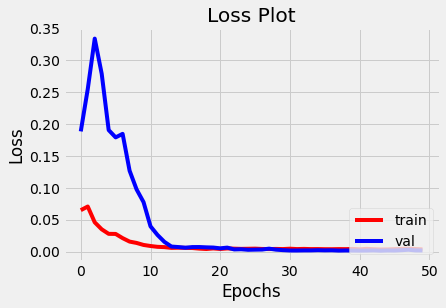

In [ ]:
# Training the model
model,train_error,val_error = fit_model(train,val,timesteps,hl,lr,batch_size,num_epochs)
print('\n')
plot_error(train_error,val_error)

In [ ]:
# Evaluating the model
mae, mse, rmse, r2_value, true,predicted = evaluate_model(model, test, timesteps)
print('\n')
print('MAE = {}'.format(mae))
print('MSE = {}'.format(mse))
print('RMSE = {}'.format(rmse))
print('R-Squared Score = {}'.format(r2_value))

5/5 [==============================] - 0s 4ms/step


MAE = 0.035654261281827075
MSE = 0.001804250034474683
RMSE = 0.042476464477104056
R-Squared Score = 0.770194864672558


In [ ]:
# Get each date data
train_date = train_data.index
val_date = val_data.index
test_date = test_data.index[timesteps:]

# Bring back onto original values
train_sc = sc.inverse_transform(train)
val_sc = sc.inverse_transform(val)
test_sc = sc.inverse_transform(test)

# Create empty fill so predicted data fits with scaler dimension
zeros_shape = test.shape[0] - timesteps
num_x_variables = len(variables) - 1
empty_fill = np.zeros((zeros_shape, num_x_variables))

# Transform back into original value
pred_gru3 = np.concatenate((empty_fill, predicted), axis=1)
pred_gru3 = sc.inverse_transform(pred_gru3)

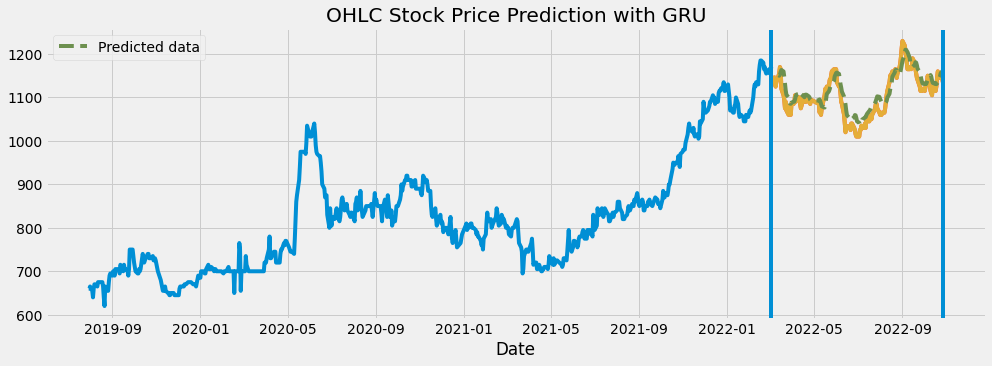

In [ ]:
# Figure size
plt.figure(figsize=(15, 5))

# Train data
plt.plot(train_date, train_sc[:, -1])

# Val data
plt.plot(val_date, val_sc[:, -1])

# Test data
plt.plot(test_data.index, test_sc[:,-1])
plt.plot(test_date, pred_gru3[:, -1], label='Predicted data', linestyle='--')

# Boundaries
plt.axvline(np.max(train_date))
plt.axvline(np.max(val_date))

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.show()

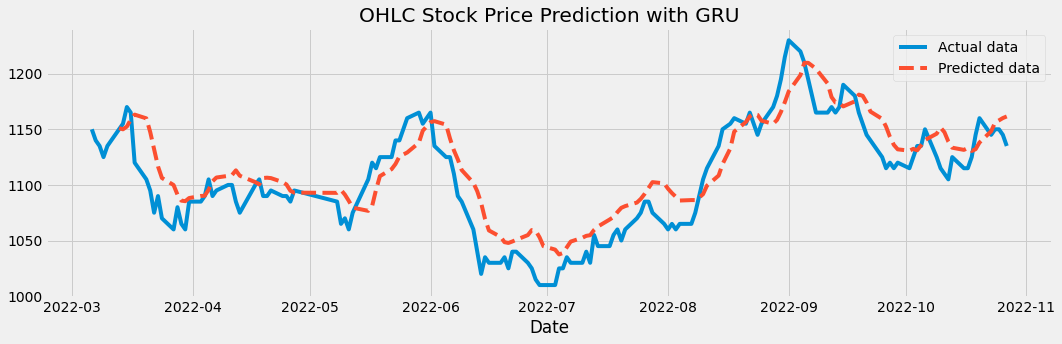

In [ ]:
plt.figure(figsize=(15, 5))

# Test data
plt.plot(test_data.index, test_sc[:, -1], label='Actual data')
plt.plot(test_date, pred_gru3[:, -1], label='Predicted data', linestyle='--')

# Attributes
plt.title('OHLC Stock Price Prediction with GRU')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()

In [ ]:
model.save(f'OHLC-GRU-3.h5')

In [ ]:
output = pd.DataFrame(pred_gru3, columns = variables)
dates = pd.DataFrame(test_sc, columns = variables)

In [ ]:
output['Pred_GRU'] =  output['Close']
output['Close'] =  dates['Close']
output = output[['Close', 'Pred_GRU']]
output

,Close,Pred_GRU
0,1150.0,1150.973240
1,1140.0,1149.987592
2,1135.0,1152.454472
3,1125.0,1158.709771
4,1135.0,1163.185293
...,...,...
149,1115.0,1148.236139
150,1115.0,1156.092289
151,1125.0,1158.009499
152,1145.0,1160.099134


In [ ]:
def ModelEvaluation(y_test, preds):

    # Evaluate the model
    mse = mean_squared_error(y_test, preds)
    rmse = sqrt(mean_squared_error(y_test, preds))
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    print('\n')
    print('MAE = {}'.format(mae))
    print('MSE = {}'.format(mse))
    print('RMSE = {}'.format(rmse))
    print('R-Squared Score = {}'.format(r2))

    return mse, rmse, mae, r2

print("Model Evaluation After Invers Transform")
mse, rmse, mae, r = ModelEvaluation(output['Close'], output['Pred_GRU'])

Model Evaluation After Invers Transform


MAE = 20.317695516270476
MSE = 572.6610197342253
RMSE = 23.93033680778909
R-Squared Score = 0.7698881738387222


In [ ]:
output.to_csv(f'OHLC-GRU-3.csv', index = False)

#Plot Gabungan

In [ ]:
'''import warnings
warnings.simplefilter("ignore", UserWarning)

run(series)'''

'import warnings\nwarnings.simplefilter("ignore", UserWarning)\n\nrun(series)'

In [ ]:
# Test data
# Create a graph of predictive results

trace0 = go.Candlestick(x=series.index,
                        open=series['Open'], 
                        high=series['High'],
                        low=series['Low'], 
                        close=series['Close'])

trace1 = go.Scatter(
    x = test_data.index,
    y = test_sc[:, -1],
    mode = 'lines',
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_date,
    y = pred_lstm[:, -1],
    mode='lines',
    line = dict(width = 1, dash = 'dashdot'),
    name = 'Predicted LSTM OHLC'
)
trace3 = go.Scatter(
    x = test_date,
    y = pred_lstm2[:, -1],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted LSTM OHLC + makro + mikro + VIX'
)
trace4 = go.Scatter(
    x = test_date,
    y = pred_lstm3[:, -1],
    mode='lines',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted LSTM OHLC + makro + mikro + VIX + Sentiment'
)
layout = go.Layout(
  title = "Stock Price Prediction with LSTM",
  xaxis = {'title' : "Date"},
  yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace0,
                      trace1, 
                      trace2, 
                      trace3, 
                      trace4], layout=layout)
fig.show()

In [ ]:
# Test data
# Create a graph of predictive results

trace0 = go.Candlestick(x=series.index,
                        open=series['Open'], 
                        high=series['High'],
                        low=series['Low'], 
                        close=series['Close'])

trace1 = go.Scatter(
    x = test_data.index,
    y = test_sc[:, -1],
    mode = 'lines',
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_date,
    y = pred_gru[:, -1],
    mode='lines',
    line = dict(width = 1, dash = 'dashdot'),
    name = 'Predicted GRU OHLC'
)
trace3 = go.Scatter(
    x = test_date,
    y = pred_gru2[:, -1],
    mode='lines+markers',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted GRU OHLC + makro + mikro + VIX'
)
trace4 = go.Scatter(
    x = test_date,
    y = pred_gru3[:, -1],
    mode='lines',
    marker_size = 1,
    line = dict(dash = 'dot'),
    name = 'Predicted GRU OHLC + makro + mikro + VIX + Sentiment'
)
layout = go.Layout(
  title = "Stock Price Prediction with GRU",
  xaxis = {'title' : "Date"},
  yaxis = {'title' : "Close"}
)
fig = go.Figure(data=[trace0,
                      trace1, 
                      trace2, 
                      trace3, 
                      trace4], layout=layout)
fig.show()

In [ ]:
import plotly.graph_objects as go

trace0 = go.Candlestick(x=series.index,
                        open=series['Open'], 
                        high=series['High'],
                        low=series['Low'], 
                        close=series['Close'])

trace1 = go.Scatter(
    x = test_data.index,
    y = test_sc[:, -1],
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_date,
    y = pred_lstm[:, -1],
    name = 'LSTM'
)
trace3 = go.Scatter(
    x = test_date,
    y = pred_gru[:, -1],
    name = 'GRU'
)


layout = go.Layout(
    title = "OHLC Stock Close Price Prediction with Various Model",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close Price"}
)
fig = go.Figure(data=[trace0, trace1, trace2, trace3,
                     ], layout=layout)
fig.show()

In [ ]:
import plotly.graph_objects as go

trace0 = go.Candlestick(x=series.index,
                        open=series['Open'], 
                        high=series['High'],
                        low=series['Low'], 
                        # inflasi=series['Inflasi'],
                        # kurs=series['Kurs'], 
                        # m2=series['M2'],
                        # vix_open=series['Vix Open'], 
                        # vix_high=series['Vix High'],
                        # vix_low=series['Vix Low'], 
                        # vix_close=series['Vix Close'],
                        # roe=series['ROE'],
                        # npm=series['NPM'], 
                        # per=series['PER'], 
                        close=series['Close'])

trace1 = go.Scatter(
    x = test_data.index,
    y = test_sc[:, -1],
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_date,
    y = pred_lstm2[:, -1],
    name = 'LSTM'
)
trace3 = go.Scatter(
    x = test_date,
    y = pred_gru2[:, -1],
    name = 'GRU'
)


layout = go.Layout(
    title = "OHLC + makro + mikro + VIX Stock Close Price Prediction with Various Model",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close Price"}
)
fig = go.Figure(data=[trace0, trace1, trace2, trace3,
                     ], layout=layout)
fig.show()

In [ ]:
import plotly.graph_objects as go

trace0 = go.Candlestick(x=series.index,
                        open=series['Open'], 
                        high=series['High'],
                        low=series['Low'], 
                        # inflasi=series['Inflasi'],
                        # kurs=series['Kurs'], 
                        # m2=series['M2'],
                        # vix_open=series['Vix Open'], 
                        # vix_high=series['Vix High'],
                        # vix_low=series['Vix Low'], 
                        # vix_close=series['Vix Close'],
                        # roe=series['ROE'],
                        # npm=series['NPM'], 
                        # per=series['PER'],
                        # sentiment_bbm=series['Sentiment BBM'],
                        # sentiment_resesi=series['Sentiment Resesi'], 
                        # sentiment_perang=series['Sentiment Perang'],
                        close=series['Close'])

trace1 = go.Scatter(
    x = test_data.index,
    y = test_sc[:, -1],
    name = 'Actual data'
)
trace2 = go.Scatter(
    x = test_date,
    y = pred_lstm3[:, -1],
    name = 'LSTM'
)
trace3 = go.Scatter(
    x = test_date,
    y = pred_gru3[:, -1],
    name = 'GRU'
)


layout = go.Layout(
    title = "OHLC + makro + mikro + VIX + Sentiment Stock Close Price Prediction with Various Model",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close Price"}
)
fig = go.Figure(data=[trace0, trace1, trace2, trace3,
                     ], layout=layout)
fig.show()